# ITMAL Exercise


REVISIONS||
---------||
2018-1219| CEF, initial.                  
2018-0207| CEF, updated.           
2018-0207| CEF, rewritten accuracy paradox section. 
2018-0305| CEF, updated with SHN comments.
2019-0901| CEF, updated for ITMAL v2.
2019-0904| CEF, updated for print-f and added conclusion Q.

## Performance Metrics

There are a number of frequently uses metrics in ML, namely accuracy, precision, recall and the $F_1$ score. All are called _metrics_ (though they are not true norms, like ${\cal L}_2$ or ${\cal L}_1$ we saw last time).

Maybe performance _score_ would be a better name than performance metric, at least for the accuracy, precision, recall we will be looking at---emphasising the conceptual distinction between the  _score-function_ and _cost(/loss/error/objective)-function_ (the later is typically a true distance/norm function).  

You can find a lot of details on say precision and recall in Wikipedia

>  https://en.wikipedia.org/wiki/Precision_and_recall


### Nomenclature

| NAME | SYMBOL | ALIAS |
| :---: | :---: | :---: |
|true positives | $TP$ | |
|true negatives | $TN$ | |
|false positives| $FP$ | type I error| 
|false negatives| $FN$ | type II error |

and $N = N_P + N_N$ being the total number of samples and the number of positive and negative samples
respectively.

### Precision

$$
\def\by{\mathbf{y}}
\def\ba{\begin{array}{lll}}
\def\ea{\end{array}}
\newcommand{\rem}[1]{}
\newcommand\st[1]{_{\scriptsize #1}}
\newcommand\myfrac[2]{\frac{#1\rule{0pt}{8pt}}{#2\rule{0pt}{8pt}}} 
\ba
 p &= \myfrac{TP}{TP + FP}
\ea
$$

### Recall or Sensitivity

$$
  \ba
    r &= \myfrac{TP}{TP + FN}\\
      &= \myfrac{TP}{N_P}
  \ea
$$

### Accuracy

$$
  \ba
      a &= \myfrac{TP + TN}{TP + TN + FP + FN}\\
        &= \myfrac{TP + TN}{N}\\
        &= \myfrac{TP + TN}{N_P~~ + N_N} 
  \ea
$$

#### Accuracy Paradox

A static constant model, say $p\st{cancer}=0$ may have higher accuracy than a real model with predictive power. This is odd!

Asymmetric weight could also be associated with the false positive and false negative predictions, yielding either FP of FN much more expensive than the other. Say, it is more expensive not to treat a person with cancer, than treating a person without cancer. 

### F-score

General $\beta$-harmonic mean of the precision and recall 
$$
    F_\beta = (1+\beta^2) \myfrac{2pr}{\beta^2 p+r}\\
$$ 
that for say $\beta=2$ or $\beta=0.5$ shifts or skews the emphasis on the two variables in the equation. Normally only the $\beta=1$ harmonic mean is used

$$
  \ba
    F_1 &= \myfrac{2pr}{p+r}\\
        &= \myfrac{2}{1/p + 1/r}
  \ea
$$
with $F$ typically being synonymous with $F_1$. 

If needed, find more info on Wikipedia

> https://en.wikipedia.org/wiki/F1_score


## Confusion Matrix

For statistical classification, the confusion matrix or error matrix (or
matching matrix in unsupervised learning) is for a two-class problem given by
the $2\times2$ matrix with dimensions 'actual' and 'predicted'

$$   
{\bf M}\st{confusion} = 
\begin{array}{l|ll}
                           & \mbox{actual true} & \mbox{actual false} \\ \hline
    \mbox{predicted true}  & TP & FP \\     
    \mbox{predicted false} & FN & TN 
\end{array}
$$

The diagonal, in the square matrix, represent predicted values being the same
as the actual values, off-diagonal elements represent erroneous prediction.

Also notice, that the layout of this matrix is different of what is given in [HOML], "Confusion Matrix", p.86/fig 3-2. This is just a minor issue, since we can always flip/rotate/transpose the matrix (say by flipping the $\by\st{true}$ and $\by\st{pred}$ arguments). 

For N-class classification the matrix gives a matrix with $N$ actual
classes and $N$ predicted classes

$$
{\bf M}\st{confusion}~~~ =
  \left[
  \begin{array}{llll}
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
  \end{array}
  \right]
$$
with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

### Nomenclature for the Confusion Matrix

The naming of the elements in the confusion matrix can be rather exotic, like _false omission rate_ (see the figure below), but we won't get to such detail here...let us stick with TP, TN, FP, FN and $F_1$!

<img src="https://itundervisning.ase.au.dk/E19_itmal/L02/Figs/performance_metrics.png" style="width:900px">

If you need more info on the confusion matrix:

>  https://en.wikipedia.org/wiki/Confusion_matrix

#### Qa Implement the Accuracy function and test it on the MNIST data.

We now follow the convention in Scikit-learn, that a score funtion takes the arguments `y_true` and then `y_pred`

```
    sklearn.metrics.accuracy_score(y_true, y_pred, ..)
```

Implement a general accuracy function `MyAccuracy(y_true, y_pred)`.

Reuse your MNIST data loader and test the `MyAccuracy` function  both on your dummy classifier and on the Stochastic Gradient Descent classifier (with setup parameters as in [HOLM]).

Compare your accuracy score with the acutal value from `sklearn.metrics.accuracy_score()`.

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score 
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
import tensorflow as tf
    
def MyAccuracy(y_true, y_pred):
    assert len(y_true) == len(y_pred), "Vector length should be eqlengthual " 
    tptn = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_true[i]:
            tptn+=1
    return tptn / len(y_pred)

class DummyClassifier(BaseEstimator, ClassifierMixin):      
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool).flatten()

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
sgd_clf = SGDClassifier(random_state=42)
x_train = np.array([i.flatten() for i in x_train])
x_test = np.array([i.flatten() for i in x_test])
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)
y_pred = cross_val_predict(sgd_clf, x_train, (y_train == 5), cv=3)

dummy_clf = DummyClassifier()
y_dummy_pred = cross_val_predict(dummy_clf, x_train, (y_train == 5), cv=3)

def TestAccuracy(y_true, y_pred):
   a0=MyAccuracy(y_true, y_pred)
   a1=accuracy_score(y_true, y_pred)
   print(f"\nmy accuracy function ={a0}")
   print(f"scikit-learn a={a1}")
print("Test of the SGDClassifier:")
TestAccuracy(y_train == 5, y_pred)
print("Test of the DummyClassifier:")
TestAccuracy(y_train == 5, y_dummy_pred)


Test of the SGDClassifier:

my accuracy function =0.9570333333333333
scikit-learn a=0.9570333333333333
Test of the DummyClassifier:

my accuracy function =0.90965
scikit-learn a=0.90965


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data.

Now, implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn...

In [12]:
# TODO: Qb..
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix

def TestForPrec(own, true, test_name):
    print(f"Test of {test_name}")
    print(f"Result for sklearn: {true}")
    print(f"Result for my function: {own}")

dummy_clf = DummyClassifier()
y_dummy_pred = cross_val_predict(dummy_clf, x_train, (y_train == 5), cv=3)

def MyPrecision(y_true, y_pred):
    assert len(y_true) == len(y_pred), "vectors not equal length"
    tp = np.sum(np.logical_and(y_true, y_pred))
    fp = np.sum(np.logical_and(y_pred, (y_true == False)))
    return tp/(tp+fp)

def MyRecall(y_true, y_pred):
    assert len(y_true) == len(y_pred), "vectors not equal length"
    tp = np.sum(np.logical_and(y_true, y_pred))
    fn = np.sum(np.logical_and(y_true, (y_pred == False)))
    return tp/(tp+fn)
    
def MyF1Score(y_true, y_pred):
    assert len(y_true) == len(y_pred), "vectors not equal length"
    prec = MyPrecision(y_true, y_pred)
    recall = MyRecall(y_true, y_pred)
    return 2*prec*recall/(prec+recall)


print("Test with SGDClassifier\n")
prec_true = precision_score((y_train == 5), y_pred)
prec_own = MyPrecision((y_train == 5), y_pred)
TestForPrec(prec_own, prec_true, "precision")

recall_true = recall_score((y_train == 5), y_pred)
recall_own = MyRecall((y_train == 5), y_pred)
TestForPrec(recall_own, recall_true, "recall")  

f1_true = f1_score((y_train == 5), y_pred)
f1_own = MyF1Score((y_train == 5), y_pred)
TestForPrec(f1_own, f1_true, "f1")

print("Test with DummyClassifier\n")
dummy_prec_true = precision_score((y_train != 5), y_dummy_pred == False)
dummy_prec_own = MyPrecision((y_train != 5), y_dummy_pred == False)
TestForPrec(dummy_prec_own, dummy_prec_true, "precision")

dummy_recall_true = recall_score((y_train != 5), y_dummy_pred == False)
dummy_recall_own = MyRecall((y_train != 5), y_dummy_pred)
TestForPrec(dummy_recall_own, dummy_recall_true, "recall")  

dummy_f1_true = f1_score((y_train != 5), y_dummy_pred == False)
dummy_f1_own = MyF1Score((y_train != 5), y_dummy_pred == False)
TestForPrec(dummy_f1_own, dummy_f1_true, "f1")

Test with SGDClassifier

Test of precision
Result for sklearn: 0.8370879772350012
Result for my function: 0.8370879772350012
Test of recall
Result for sklearn: 0.6511713705958311
Result for my function: 0.6511713705958311
Test of f1
Result for sklearn: 0.7325171197343846
Result for my function: 0.7325171197343846
Test with DummyClassifier

Test of precision
Result for sklearn: 0.90965
Result for my function: 0.90965
Test of recall
Result for sklearn: 1.0
Result for my function: 0.0
Test of f1
Result for sklearn: 0.9526876652789777
Result for my function: 0.9526876652789777


#### Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Generate the confusion matrix for both the Dummy and the SGD classifier using the `scklearn.metrics.confusion_matrix` function. 

I got the two confusion matrices

```
M_dummy=[[18166     0]
        [ 1834     0]]
   
M_SDG=[[17618   548]
      [  267  1567]]

```
your data may look similar (but not 100% eq

In [13]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
class DummyClassifier(BaseEstimator, ClassifierMixin):      
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

dummy = DummyClassifier()
sgd_classifier = SGDClassifier(random_state=42)
sgd_pred = cross_val_predict(sgd_classifier, x_train, y_train == 5, cv=3)
dummy_pred = cross_val_predict(dummy, x_train, y_train == 5, cv=3)
sgd_confusion = confusion_matrix(y_train == 5, sgd_pred)
dummy_confusion = confusion_matrix(y_train == 5, dummy_pred)
print(dummy_confusion)
print(sgd_confusion)

[[54579     0]
 [ 5421     0]]
[[53892   687]
 [ 1891  3530]]


#### Qd A Confusion Matrix Heat-map

Generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively, getting inspiration from [HOML] "Error Analysis", pp.96-97.

This heat map could be an important guide for you when analysing multiclass data in the future.

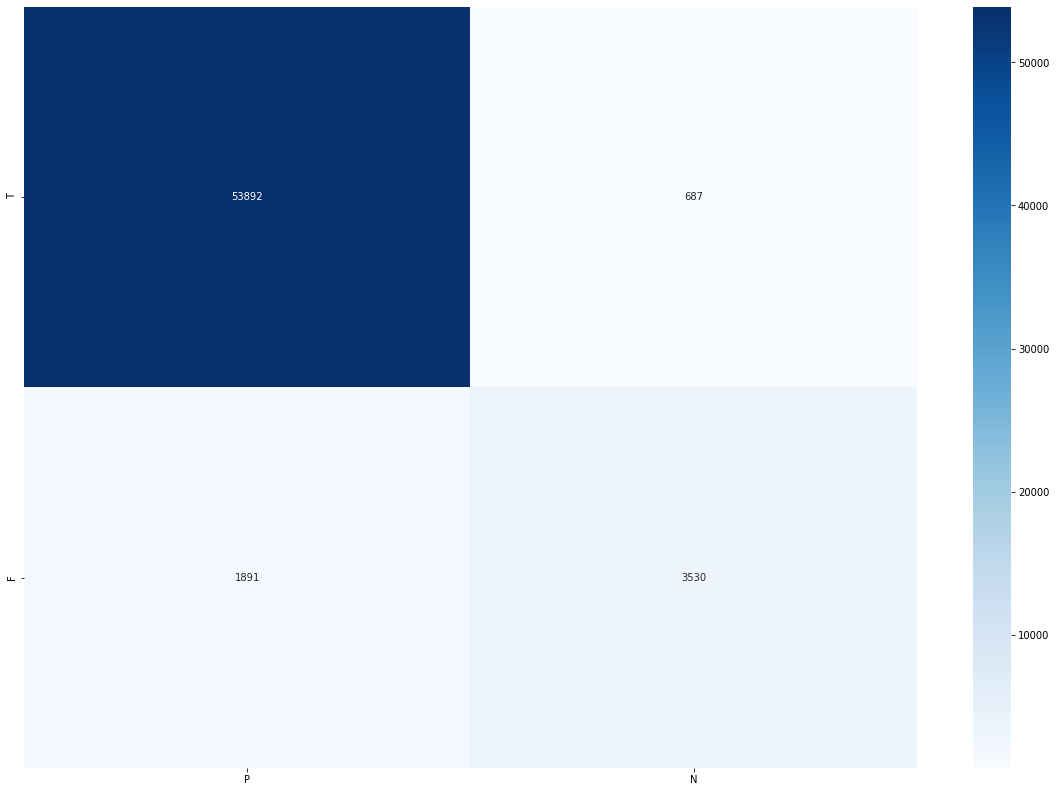

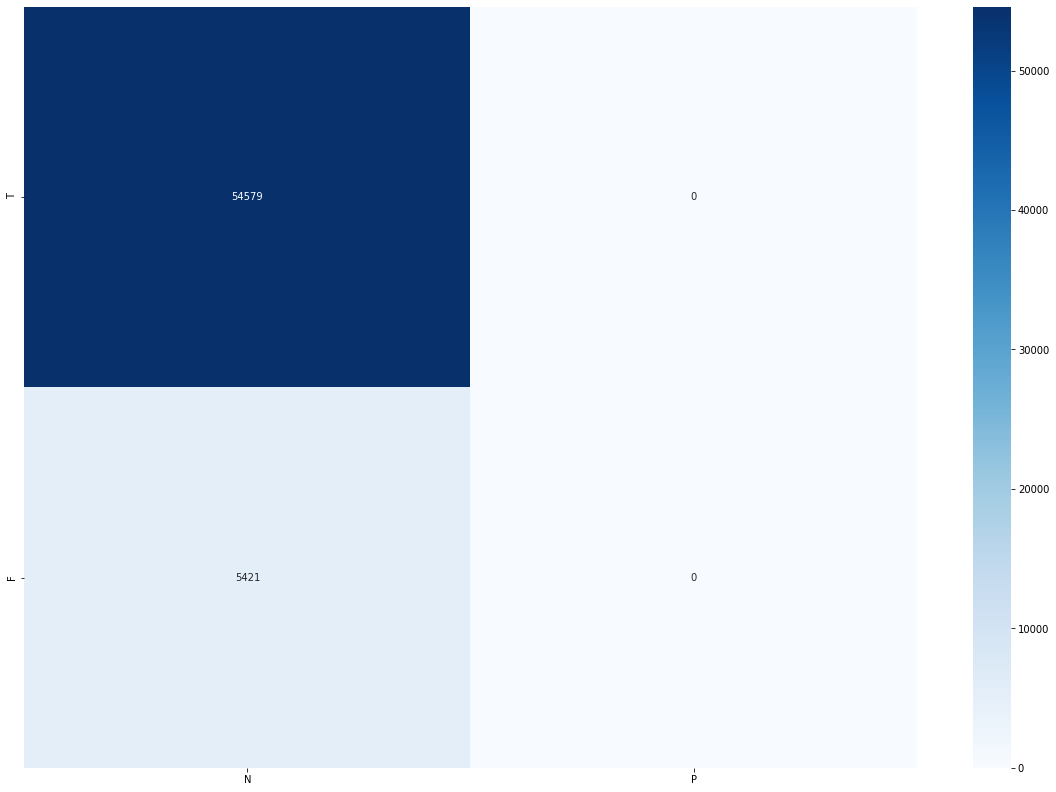

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(sgd_confusion, index = [i for i in "TF"],
                  columns = [i for i in "PN"])
plt.figure(figsize = (20,14))
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

df_cm = pd.DataFrame(dummy_confusion, index = [i for i in "TF"],
                  columns = [i for i in "NP"])
plt.figure(figsize = (20,14))
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

### Qe Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).